<a href="https://colab.research.google.com/github/Matiiwtcp/Proyecto_final_bigdata/blob/main/Proyecto_final_MLBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga, estructurado y limpieza de datos

## Conectarse a Drive

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importación de librerias

In [108]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#WIKIPEDIA
#PBI, Esperanza de vida (2020) : https://www.kaggle.com/datasets/daniboy370/world-data-by-country-2020

# https://www.kaggle.com/code/noobiedatascientist/explaining-happiness

#Indice publicado por el Instituto Fraser mide el grado en que las políticas e instituciones de los países apoyan la libertad económica.
#Libertad Economica: (2018) https://www.kaggle.com/datasets/gsutters/economic-freedom/data

#Tasa de finalización - Base de datos mundial de UNICEF (abril de 2021)
#Tasa de niños y jóvenes sin escolarizar - Instituto de Estadística de la UNESCO (marzo de 2021).
#Tasa de NO Escolaridad y de Finalizacion https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data

## Carga de Datasets y preparado de datos.

#### Libertad Económica - csv

In [109]:
# Principal medida mundial de la libertad económica, clasificando a los países en función de cinco áreas:
# Área 1: Tamaño del gobierno - A medida que aumentan el gasto público, los impuestos y el tamaño de las empresas controladas por el gobierno,
# la toma de decisiones del gobierno es sustituida por la elección individual y la libertad económica se reduce.

# Área 2: Sistema legal y derechos de propiedad - La protección de las personas y sus bienes legítimamente adquiridos es un elemento central tanto de
# la libertad económica como de la sociedad civil. De hecho, es la función más importante del gobierno.

# Área 3: Dinero sólido - La inflación erosiona el valor de los salarios y ahorros ganados legítimamente.
# Por lo tanto, el dinero sólido es esencial para proteger los derechos de propiedad. Cuando la inflación no solo es alta, sino también volátil,
# se vuelve difícil para las personas planificar el futuro y, por lo tanto, utilizar la libertad económica de manera efectiva.

# Área 4: Libertad para comerciar internacionalmente - La libertad de intercambio, en su sentido más amplio, comprar, vender, hacer contratos, etc.,
# es esencial para la libertad económica, que se reduce cuando la libertad de intercambio no incluye a las empresas y a los individuos de
# otras naciones.

# Área 5: Regulación - Los gobiernos no solo utilizan una serie de herramientas para limitar el derecho a intercambiar internacionalmente,
# sino que también pueden desarrollar regulaciones onerosas que limitan el derecho a intercambiar, obtener crédito, contratar o trabajar para
# quien usted desee, o operar libremente su negocio.


ruta_de_archivo = '/content/drive/MyDrive/libertadeconomica.csv'
dataframeLibertadEconomica = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_le = dataframeLibertadEconomica.copy()

# Convertir valores nulos a NaN
df_le.replace('Datos nulos', np.nan, inplace=True)

# Filtrar las filas donde 'year' sea igual a 2016
df_le = df_le[df_le['year'] == 2016]

# Seleccionar las columnas 'ECONOMIC FREEDOM' y 'countries'
df_le = df_le[['ECONOMIC FREEDOM', 'countries']]

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'countries': 'Paises',
    'ECONOMIC FREEDOM': "Libertad Economica" }

# Eliminar filas con NaN
df_le = df_le.dropna()

# Renombrar las columnas en el DataFrame
df_le.rename(columns=nuevos_nombres, inplace=True)

#### Felicidad global - csv

In [110]:
ruta_de_archivo = '/content/drive/MyDrive/world-happiness-report-2021.csv'
dataframeFelicidad = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_f = dataframeFelicidad.copy()

# Convertir valores nulos a NaN
df_f.replace('Datos nulos', np.nan, inplace=True)

df_f= df_f[['ï»¿Country name', 'Ladder score']]

# Eliminar filas con NaN
df_f= df_f.dropna()

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'ï»¿Country name': 'Paises',
    'Ladder score': 'Felicidad' }

# Renombrar las columnas en el DataFrame
df_f.rename(columns=nuevos_nombres, inplace=True)

#### Experanza de vida - csv

In [111]:
# La esperanza de vida es una medida estadística del tiempo promedio (ver más abajo) que se espera que viva un organismo

ruta_de_archivo = '/content/drive/MyDrive/Lifeexpectancy.csv'
dataframeEsperanzaVida = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_ev = dataframeEsperanzaVida.copy()


df_ev= df_ev[['Country', 'Life expectancy']]

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'Country': 'Paises',
    'Life expectancy': 'Esperanza de vida' }

# Renombrar las columnas en el DataFrame
df_ev.rename(columns=nuevos_nombres, inplace=True)

# Convertir valores nulos a NaN
df_ev.replace('Datos nulos', np.nan, inplace=True)

# Eliminar filas con NaN
df_ev= df_ev.dropna()

#### PBI per capita - csv

In [112]:
# Una lista de países del mundo por producto interno bruto (en paridad de poder adquisitivo) per cápita,
# es decir, el valor de paridad de poder adquisitivo (PPA) de todos los bienes y servicios finales producidos dentro de un país en un año determinado.

ruta_de_archivo = '/content/drive/MyDrive/PBIpercapita.csv'
dataframePBIpercapita = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_pbi = dataframePBIpercapita.copy()

# Convertir valores nulos a NaN
df_pbi.replace('Datos nulos', np.nan, inplace=True)

df_pbi= df_pbi[['Country', 'GDP per capita']]

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'Country': 'Paises',
    'GDP per capita': 'PBI' }

# Renombrar las columnas en el DataFrame
df_pbi.rename(columns=nuevos_nombres, inplace=True)

# Eliminar filas con NaN
df_pbi= df_pbi.dropna()

#### Tasa suicidio - csv

In [113]:
# Esta lista de países contiene la tasa de suicidios según los datos publicados por la Organización Mundial de la Salud (OMS).
ruta_de_archivo = '/content/drive/MyDrive/Suicide rate.csv'
dataframeSuicidios = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_s = dataframeSuicidios.copy()

df_s = df_s [['Country', 'Suicide rate']]

# Diccionario que se utiliza para cambiar los nombres de las columnas
nuevos_nombres = {
    'Country': 'Paises',
    'Suicide rate': 'Ratio de suicidios'}

# Renombrar las columnas en el DataFrame
df_s .rename(columns=nuevos_nombres, inplace=True)

# Convertir valores nulos a NaN
df_s.replace('Datos nulos', np.nan, inplace=True)

# Eliminar filas con NaN
df_s= df_s.dropna()

#### Educación global - csv

In [114]:
ruta_de_archivo = '/content/drive/MyDrive/Global_Education.csv'
dataframeEducacionGlobal = pd.read_csv(ruta_de_archivo, encoding='latin1')
df_eg = dataframeEducacionGlobal.copy ()

# Convertir valores nulos a NaN
df_eg.replace('Datos nulos', np.nan, inplace=True)

# Eliminar filas con NaN
df_eg = df_eg.dropna()

# Ajustar nombres de columnas eliminando espacios adicionales
df_eg.columns = df_eg.columns.str.strip()

# Diccionario de traducción de nombres de columnas
nuevos_nombres = {
    'Countries and areas': 'Paises',
    'OOSR_Pre0Primary_Age_Male': 'Tasa No Escolarización Preescolar (Varones)',
    'OOSR_Pre0Primary_Age_Female': 'Tasa No Escolarización Preescolar (Mujeres)',
    'OOSR_Primary_Age_Male': 'Tasa No Escolarización Primaria (Varones)',
    'OOSR_Primary_Age_Female': 'Tasa No Escolarización Primaria (Mujeres)',
    'OOSR_Lower_Secondary_Age_Male': 'Tasa No Escolarización Primer Ciclo Secundaria (Varones)',
    'OOSR_Lower_Secondary_Age_Female': 'Tasa No Escolarización Primer Ciclo Secundaria (Mujeres)',
    'OOSR_Upper_Secondary_Age_Male': 'Tasa No Escolarización Segundo Ciclo Secundaria (Varones)',
    'OOSR_Upper_Secondary_Age_Female': 'Tasa No Escolarización Segundo Ciclo Secundaria (Mujeres)',
    'Completion_Rate_Primary_Male': 'Tasa Finalización Educación Primaria (Varones)',
    'Completion_Rate_Primary_Female': 'Tasa Finalización Educación Primaria (Mujeres)',
    'Completion_Rate_Lower_Secondary_Male': 'Tasa Finalización Primer Ciclo Secundaria (Varones)',
    'Completion_Rate_Lower_Secondary_Female': 'Tasa Finalización Primer Ciclo Secundaria (Mujeres)',
    'Completion_Rate_Upper_Secondary_Male': 'Tasa Finalización Segundo Ciclo Secundaria (Varones)',
    'Completion_Rate_Upper_Secondary_Female': 'Tasa Finalización Segundo Ciclo Secundaria (Mujeres)',
    'Unemployment_Rate': 'Tasa Desempleo'
    }

# Renombrar las columnas en el DataFrame
df_eg.rename(columns=nuevos_nombres, inplace=True)

df_eg = df_eg[['Paises', 'Tasa No Escolarización Preescolar (Varones)',
               'Tasa No Escolarización Preescolar (Mujeres)','Tasa No Escolarización Primaria (Varones)',
               'Tasa No Escolarización Primaria (Mujeres)','Tasa No Escolarización Primer Ciclo Secundaria (Varones)',
               'Tasa No Escolarización Primer Ciclo Secundaria (Mujeres)',
               'Tasa No Escolarización Segundo Ciclo Secundaria (Varones)',
               'Tasa No Escolarización Segundo Ciclo Secundaria (Varones)',
               'Tasa No Escolarización Segundo Ciclo Secundaria (Mujeres)',
               'Tasa Finalización Educación Primaria (Varones)',
               'Tasa Finalización Educación Primaria (Mujeres)',
               'Tasa Finalización Primer Ciclo Secundaria (Varones)',
               'Tasa Finalización Primer Ciclo Secundaria (Mujeres)',
               'Tasa Finalización Segundo Ciclo Secundaria (Varones)',
               'Tasa Finalización Segundo Ciclo Secundaria (Mujeres)',
               'Tasa Desempleo'
               ]]

##Funciones para graficar

In [115]:
def create_choropleth(df, location_column, z_column, title, colorbar_title, zmin=None, zmax=None):
    data = go.Choropleth(
        locations=df[location_column],
        locationmode='country names',
        z=df[z_column],
        colorscale='Viridis',
        colorbar={'title': colorbar_title}
    )

    fig = go.Figure(data=[data])
    fig.update_geos(projection_type='natural earth')
    fig.update_layout(
        title_text=title,
        geo=dict(showframe=False, coastlinecolor='white', showcoastlines=True)
    )

    if zmin is not None:
        fig.update_traces(zmin=zmin)

    if zmax is not None:
        fig.update_traces(zmax=zmax)

    return fig


# Función para graficar varios
def create_multi_choropleth(df, location_column, z_column, title, colorbar_title, zmin=None, zmax=None):
    data = go.Choropleth(
        locations=df[location_column],
        locationmode='country names',
        z=df[z_column],
        colorscale='Viridis',
        colorbar={'title': colorbar_title},
        zmin=zmin,
        zmax=zmax
    )

    return data

# Gráficos

#### Libertad económica - gráfico


In [116]:
fig_economic_freedom = create_choropleth(df_le, 'Paises', 'Libertad Economica', 'Mapa de Libertad Económica', 'Libertad Economica',zmax=8,zmin=2)
fig_economic_freedom.data[0].colorscale = 'Inferno'
fig_economic_freedom.show()

#### Felicidad - gráfico

In [117]:
fig_happines = create_choropleth(df_f, 'Paises', 'Felicidad', 'Mapa de la Felicidad', 'Felicidad')
fig_happines.data[0].colorscale = 'Inferno'
fig_happines.show()

#### Esperanza de vida - gráfico

In [118]:
fig_life_expectancy = create_choropleth(df_ev, 'Paises', 'Esperanza de vida', 'Mapa de Esperanza de vida', 'Esperanza de vida',zmax=85,zmin=50)
fig_life_expectancy.show()

#### PBI per capita - gráfico

In [119]:
fig_pbi_per_capita = create_choropleth(df_pbi, 'Paises', 'PBI', 'Mapa de PBI', 'PBI Per Capita',zmax=70000,zmin=2000)
fig_pbi_per_capita .data[0].colorscale = 'Magma'
fig_pbi_per_capita.show()

#### Ratio de suicidios - gráfico

In [120]:
fig_suicidios = create_choropleth(df_s, 'Paises', 'Ratio de suicidios', 'Mapa de Ratio de Suicidios', 'Suicidios c/100k Habitantes')
fig_suicidios.data[0].colorscale = 'YlGnBu'
fig_suicidios.show()

#### Escolarización por niveles - gráfico

#### Desempleo - gráfico

In [121]:
fig_tasa_desempleo = create_choropleth(df_eg, 'Paises', 'Tasa Desempleo', 'Tasa Desempleo', '%')
fig_tasa_desempleo.data[0].colorscale = 'Reds'
fig_tasa_desempleo.show()

In [122]:
# Crear subgráficos con tasas de no escolarización por nivel
niveles_educacion = ['Preescolar', 'Primaria', 'Primer Ciclo Secundaria', 'Segundo Ciclo Secundaria']
num_filas = 2

fig = make_subplots(rows=num_filas, cols=len(niveles_educacion) // num_filas,
                    subplot_titles=[f'{nivel} ' for nivel in niveles_educacion],
                    specs=[[{'type': 'choropleth'}] * (len(niveles_educacion) // num_filas) for _ in range(num_filas)])

colorbar_title = "Tasa de No Escolarización"
zmin = 0  # Valor mínimo para la barra de colores
zmax = 100  # Valor máximo para la barra de colores

for i, nivel in enumerate(niveles_educacion, start=1): # Calculamos la tasa de no escolarización media entre varones y mujeres
    columna_varones = f'Tasa No Escolarización {nivel} (Varones)'
    columna_mujeres = f'Tasa No Escolarización {nivel} (Mujeres)'
    df_eg[f'Tasa No Escolarización {nivel} (Media)'] = df_eg[[columna_varones, columna_mujeres]].mean(axis=1)

    df_filtered = df_eg[df_eg[f'Tasa No Escolarización {nivel} (Media)'] > 0]
    df_sorted = df_filtered.sort_values(by=f'Tasa No Escolarización {nivel} (Media)', ascending=False)

    if not df_sorted.empty:
        data = create_multi_choropleth(df_sorted, 'Paises', f'Tasa No Escolarización {nivel} (Media)',
                                       f'Tasas de No Escolarización {nivel}', colorbar_title, zmin, zmax,)
        data.colorscale = 'YlOrRd'
        row = (i - 1) % num_filas + 1
        col = (i - 1) // num_filas + 1
        fig.add_trace(data, row=row, col=col)

fig.update_geos(projection_type='natural earth')
fig.update_layout(
    height=800,
    width=1400,
    title_text="Tasas de No Escolarización por Nivel"
)
fig.show()

In [123]:
# Crear subgráficos con tasas de finalización por nivel y género
niveles_educacion = ['Educación Primaria', 'Primer Ciclo Secundaria', 'Segundo Ciclo Secundaria']
num_filas = 3

fig = make_subplots(rows=num_filas, cols=len(niveles_educacion) // num_filas,
                    subplot_titles=[f'{nivel} - Media de Géneros' for nivel in niveles_educacion],
                    specs=[[{'type': 'choropleth'}] * (len(niveles_educacion) // num_filas) for _ in range(num_filas)])

colorbar_title = "Tasa Finalización"
zmin = 0  # Valor mínimo para la barra de colores
zmax = 100  # Valor máximo para la barra de colores

for i, nivel in enumerate(niveles_educacion, start=1):
    columna_varones = f'Tasa Finalización {nivel} (Varones)'
    columna_mujeres = f'Tasa Finalización {nivel} (Mujeres)'
    df_eg[f'Tasa Finalización {nivel} (Media)'] = df_eg[[columna_varones, columna_mujeres]].mean(axis=1)

    df_filtered = df_eg[df_eg[f'Tasa Finalización {nivel} (Media)'] > 0]
    df_sorted = df_filtered.sort_values(by=f'Tasa Finalización {nivel} (Media)', ascending=False)

    if not df_sorted.empty:
        data = create_multi_choropleth(df_sorted, 'Paises', f'Tasa Finalización {nivel} (Media)',
                                       f'Tasas de Finalización {nivel}', colorbar_title, zmin, zmax)
        data.colorscale = 'Greens'
        row = (i - 1) % num_filas + 1
        col = ((i - 1) // num_filas) % (len(niveles_educacion) // num_filas) + 1
        fig.add_trace(data, row=row, col=col)

fig.update_geos(projection_type='natural earth')
fig.update_layout(
    height=1000,
    width=1200,
    title_text="Tasas de Finalización por Nivel"
)

fig.show()

##Clustering

In [124]:
from functools import reduce
# Lista de dataframes

df_desempleo = df_eg[['Paises','Tasa Desempleo']] # Nos quedamos solo con el Desempleo en el dataframe de Educacion Global, porque los datos de Escolarizacion tienen pocos paises registrados y para
                                          #el clustering queriamos abarcar la mayor cantidad de naciones.


dataframes = [df_le, df_f, df_desempleo , df_pbi, df_ev, df_s] #Clusterizamos segun Libertad Economica, Felicidad, Desempleo, PBI, Esperanza de vida y Tasa de Suicidios.

# Utilizar la función reduce y merge para combinar dataframes en base a 'Paises'
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Paises', how='inner'), dataframes)



#Hayar el K optimo

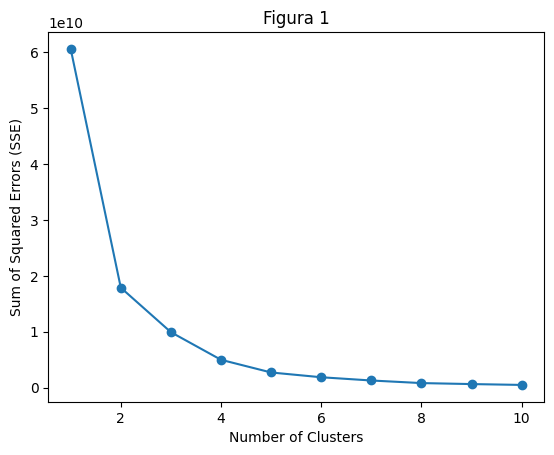

In [125]:
from sklearn.cluster import KMeans
def find_optimal_clusters_kmeans(data, max_k):
    sse = []  # Sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10).fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Figura 1")
    plt.show()

find_optimal_clusters_kmeans(merged_df[['Libertad Economica', 'Felicidad', 'PBI', 'Esperanza de vida','Ratio de suicidios']], 10)


#Clustering y Grafico

In [126]:
# Selecciona las columnas para el clustering
data = merged_df[['Libertad Economica', 'Felicidad', 'PBI', 'Esperanza de vida', 'Ratio de suicidios']].values

# Aplicar KMeans con n_clusters=3
random_seed = 6
kmeans = KMeans(n_clusters=3, random_state=random_seed, n_init=10, init='k-means++')
clusters = kmeans.fit_predict(data)

# Obtener las asignaciones de cluster para cada estado
cluster_assignments = kmeans.labels_

# Agregar la información de cluster al DataFrame original
merged_df['Cluster'] = cluster_assignments

In [127]:
fig = px.choropleth(merged_df,
                    locations='Paises',
                    locationmode='country names',
                    color='Cluster',
                    projection='orthographic',
                    title='Mapa Mundial con Proyección en Globo',
                    color_continuous_scale='Viridis')

# Ajusta el centro para centrar la proyección
fig.update_geos(center=dict(lon=0, lat=0))

# Configura el colorbar con tickvals para mostrar solo valores enteros
fig.update_coloraxes(colorbar=dict(tickvals=[0, 1, 2], ticktext=['0', '1', '2']))

# Muestra el gráfico
fig.show()